# Conditionnement

Nous rappelons que le conditionnement d'une matrice relativement à une norme $\Vert\cdot\Vert$ est défini par

$$ 
\operatorname{cond}(A) = |\!|\!| A |\!|\!| \ |\!|\!| A^{-1} |\!|\!|
\,,
$$

où l'on note $|\!|\!|A |\!|\!| = \sup\limits_{\Vert x\Vert = 1} \Vert Ax\Vert$ la norme subordonnée correspondante.  

La notion de conditionnement est utilisée par exemple pour quantifier la difficulté d'un système linéaire a être résolu.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Matrice de Hilbert

La _matrice de Hilbert_ d'ordre $N$ est la matrice $H_N = (a_{i,j}) \in\mathcal{M}_N(\mathbb{R})$ de coefficients 

$$
a_{i,j} = \frac{1}{i+j-1}\,.
$$

### Question 1

> Proposez une fonction `Hilbert` qui prend en argument un entier $N$ et qui retourne $H_N$. Affichez la matrice de Hilbert pour $N=5$.

In [17]:
def Hilbert(N):
    H=np.zeros([N,N])
    for i in range(0,N):
        for j in range(0,N):
            H[i,j] = 1/(i+j+1)
    return H
            

In [18]:
N = 5
print(Hilbert(N))
#print(np.zeros([N,N]))

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


### Question 2

> En utilisant la fonction `cond` du package `numpy.linalg`, calculez et tracez le logarithme du conditionnement de la matrice de Hilbert pour la norme 2 pour $N$ variant entre $1$ et $10$.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


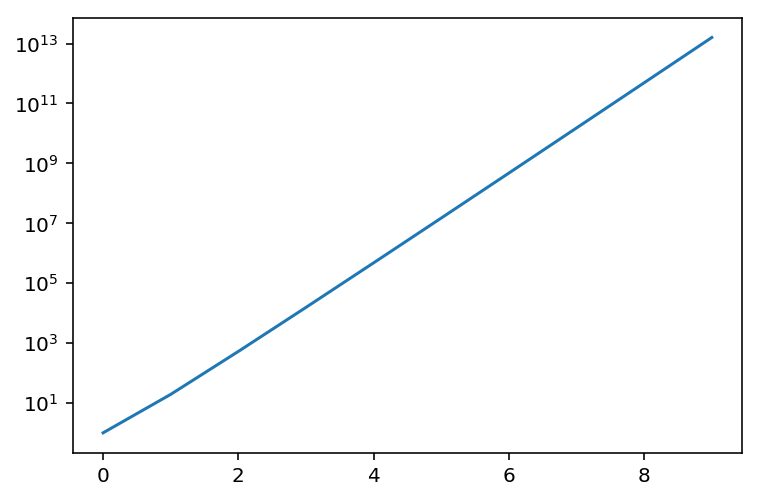

In [44]:
a = np.ones(10)
for i in range (1,11):
    a[i-1] = np.linalg.cond(Hilbert(i))
    
plt.semilogy(a)

### Question 3

> Reprenez dans les TPs précédents la fonction `solve` qui retourne la solution d'un système linéaire en calculant la décomposition $LU$ de la matrice. Vous devez utiliser la fonction faite maison et pas la décomposition $LU$ donnée par la librairie `numpy.linalg`. 
>
> Calculez la solution du système linéaire $H_N u = b$, où $b\in\mathcal{M}_{n,1}(\mathbb{R})$ un vecteur aléatoire, avec différentes valeurs de $N$. Vous testerez dans quelle mesure le système est bien résolu.

_Indication_ : vous pourrez afficher pour les différentes valeurs de $N$ 
* la valeur du conditionnement, 
* la norme 2 de l'erreur $\Vert H_N \bar u - b\Vert_2$, où $\bar{u}$ est la solution calculée,
* la valeur du booléen renvoyé par la commande `np.allclose`.

In [58]:
def lu(A):
    n = np.shape(A)
    L = np.eye(n)
    U = np.zeros((n,n))
    
    B = A *1.0
    
    for i in range (n-1):
        a = B[i,i]
        if (a==0):
            return L,U,False
        
        U[i,i] = a
        U[i,i+1:] = B[i,i+1:]
        L[i+1:]
        L[i+1:,i] = B[i+1:,i]/a
        B[i+1:,i+1:] -= np.outer(L[i+1:,i],U[i,i+1:])
        
    return L,U,True
        

In [66]:
def solve_triu(T,b):
    n,p = T.shape
    x = np.zeros(n)
    x[n-1] = b[n-1]/T[n-1,n-1]
    for i in range(2,n+1):
        x[n-i] = x[n-(i-1)] + b[n-i]/T[n-i,n-1]
    return x

def solve_tril(T,b):
    n,p = T.shape
    x = np.zeros(n)
    x[0] = b[0]/T[0,0]
    for i in range(1,n):
        x[i] = x[i-1] + b[i]/T[i,i]
    return x

def solve(A,b):
    L,U,ret = lu(A)
    b2 = solve_tril(L,b)
    u = solve_triu(U,b2)
    return u

In [69]:
N = 5
b = rd.random(N)
Hn = Hilbert(N)
u = np.linalg.solve(Hn,b)
print(b)
print(" ")
print(Hn)
print(" ")
print(u)
print(" ")
print(Hn@u)

[0.40166834 0.64960378 0.59284913 0.45189736 0.22533291]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[  -53.04441222  1100.55550056 -5162.14946967  8285.60076313
 -4237.57685301]
 
[0.40166834 0.64960378 0.59284913 0.45189736 0.22533291]


## Matrice du Laplacien

### Question 4

> Recommencez l'exercice précédent en remplaçant la matrice de Hilbert par la matrice du Laplacien
$$
A = (N+1)^2 \begin{pmatrix}
2&-1&0&\ldots&0\\
-1&2&-1&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&-1&2&-1\\
0&\ldots&0&-1&2
\end{pmatrix}.
$$
Commentez vos résultats.

In [78]:
N = 10
A = (N+1)**2 * (2*np.eye(N)-np.eye(N,k=-1)-np.eye(N,k=1))
print(A)

[[ 242. -121.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-121.  242. -121.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -121.  242. -121.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -121.  242. -121.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -121.  242. -121.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -121.  242. -121.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -121.  242. -121.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -121.  242. -121.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -121.  242. -121.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -121.  242.]]


In [80]:

b = rd.random(N)

u = np.linalg.solve(A,b)
print(b)
print(" ")
print(A)
print(" ")
print(u)
print(" ")
print(A@u)

[0.05149419 0.64677335 0.07166776 0.15184731 0.85702083 0.98228516
 0.78286887 0.09414618 0.10140778 0.98361831]
 
[[ 242. -121.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-121.  242. -121.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -121.  242. -121.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -121.  242. -121.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -121.  242. -121.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -121.  242. -121.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -121.  242. -121.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -121.  242. -121.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -121.  242. -121.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -121.  242.]]
 
[0.0169993  0.03357304 0.04480153 0.05543774 0.064819   0.06711745
 0.06129784 0.04900824 0.03594057 0.02203483]
 
[0.05149419 0.64677335 0.07166776 0.15184731 0.85702083 0.98228516
 0.78286887 0.09414618 0.10140778 0.98361831]
